# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [16]:
import cv2 as cv

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path:", path)

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Use your local path
path = 'D:\SkyExpert\session1\images\dog.jpg'
img = cv.imread(path)  # Read image in BGR

# Show original BGR image
cv.imshow("BGR Image", img)

# Convert to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Grayscale Image", gray)

# Wait until a key is pressed, then close windows
cv.waitKey(0)
cv.destroyAllWindows()


### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [9]:
import cv2 as cv

# Load your image
path = 'D:\SkyExpert\session1\images\dog.jpg'
img = cv.imread(path)


# Step 2: Get original dimensions
h, w = img.shape[:2]

# Step 3: Downscale to 60%
new_dim_down = (int(w * 0.6), int(h * 0.6))  # (width, height)
img_down = cv.resize(img, new_dim_down, interpolation=cv.INTER_AREA)

# Step 4: Upscale to 200%
new_dim_up = (int(w * 2.0), int(h * 2.0))
img_up = cv.resize(img, new_dim_up, interpolation=cv.INTER_CUBIC)

# Step 5: Show all images in OpenCV windows
cv.imshow("Original Image", img)
cv.imshow("Downscaled (60%)", img_down)
cv.imshow("Upscaled (200%)", img_up)

# Wait until you press a key, then close all windows
cv.waitKey(0)
cv.destroyAllWindows()


### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [11]:
import cv2 as cv

# Load image
path = 'D:\SkyExpert\session1\images\dog.jpg'
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path.")

# Step 1: Get original size
h, w = img.shape[:2]

# Step 2: Resize width only → set width=100, keep original height
resize_w = cv.resize(img, (100, h))

# Step 3: Resize height only → set height=200, keep original width
resize_h = cv.resize(img, (w, 200))

# Step 4: Resize both → (200, 200)
resize_both = cv.resize(img, (200, 200))

# Step 5: Display results in windows
cv.imshow("Original Image", img)
cv.imshow("Width = 100 (distorted horizontally)", resize_w)
cv.imshow("Height = 200 (distorted vertically)", resize_h)
cv.imshow("Resized to (200, 200)", resize_both)

# Wait until a key is pressed
cv.waitKey(0)
cv.destroyAllWindows()


### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [13]:
import cv2 as cv

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path:", path)

# Get original size
h, w = img.shape[:2]

# Scale factors
scale_up = 1.2
scale_down = 0.6

# New dimensions
up_dim = (int(w * scale_up), int(h * scale_up))
down_dim = (int(w * scale_down), int(h * scale_down))

# Scaling with INTER_LINEAR (smooth)
up_linear = cv.resize(img, up_dim, interpolation=cv.INTER_LINEAR)
down_linear = cv.resize(img, down_dim, interpolation=cv.INTER_LINEAR)

# Scaling with INTER_NEAREST (blocky)
up_nearest = cv.resize(img, up_dim, interpolation=cv.INTER_NEAREST)
down_nearest = cv.resize(img, down_dim, interpolation=cv.INTER_NEAREST)

# Show results in separate windows
cv.imshow("Original", img)
cv.imshow("Scaled UP (1.2x) - INTER_LINEAR", up_linear)
cv.imshow("Scaled UP (1.2x) - INTER_NEAREST", up_nearest)
cv.imshow("Scaled DOWN (0.6x) - INTER_LINEAR", down_linear)
cv.imshow("Scaled DOWN (0.6x) - INTER_NEAREST", down_nearest)

# Wait until key press
cv.waitKey(0)
cv.destroyAllWindows()


### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [15]:
import cv2 as cv

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path:", path)

# Crop region [y1:y2, x1:x2]
cropped = img[20:200, 50:200]

# Display original
cv.imshow("Original Image", img)

# Display cropped region
cv.imshow("Cropped Region [20:200, 50:200]", cropped)

# Wait for key press and close windows
cv.waitKey(0)
cv.destroyAllWindows()


### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

In [19]:
import cv2 as cv
import numpy as np

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path:", path)

# Get height and width
h, w = img.shape[:2]

# Find mid-points
mid_h = h // 2
mid_w = w // 2

# Split into 4 blocks
top_left  = img[0:mid_h, 0:mid_w]
top_right = img[0:mid_h, mid_w:w]
bottom_left  = img[mid_h:h, 0:mid_w]
bottom_right = img[mid_h:h, mid_w:w]

# Display each block
cv.imshow("Top Left", top_left)
cv.imshow("Top Right", top_right)
cv.imshow("Bottom Left", bottom_left)
cv.imshow("Bottom Right", bottom_right)

# Stitch back the blocks
top_row = np.hstack((top_left, top_right))      # Horizontal concat
bottom_row = np.hstack((bottom_left, bottom_right))
reconstructed = np.vstack((top_row, bottom_row)) # Vertical concat

# Display reconstructed image
cv.imshow("Reconstructed Image", reconstructed)

# Wait and close
cv.waitKey(0)
cv.destroyAllWindows()


### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [21]:
import cv2 as cv
import numpy as np

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check the path:", path)

# Get dimensions
h, w = img.shape[:2]
center = (w // 2, h // 2)

# Rotation matrices
M45 = cv.getRotationMatrix2D(center, 45, 1.0)   # 45° rotation
M90 = cv.getRotationMatrix2D(center, 90, 1.0)   # 90° rotation
M180 = cv.getRotationMatrix2D(center, 180, 1.0) # 180° rotation

# Apply warpAffine
rotated_45 = cv.warpAffine(img, M45, (w, h))
rotated_90 = cv.warpAffine(img, M90, (w, h))
rotated_180 = cv.warpAffine(img, M180, (w, h))

# Display results
cv.imshow("Original Image", img)
cv.imshow("Rotated 45°", rotated_45)
cv.imshow("Rotated 90°", rotated_90)
cv.imshow("Rotated 180°", rotated_180)

# Wait for key press and close windows
cv.waitKey(0)
cv.destroyAllWindows()


### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [25]:
h, w = img.shape[:2]
center = (w // 2, h // 2)

# --- Method 1: Rotate + Scale together ---
M = cv.getRotationMatrix2D(center, 45, 0.5)  # rotate 45°, scale 0.5
rotated_scaled = cv.warpAffine(img, M, (w, h))

# --- Method 2: Separate Resize then Rotate ---
resized = cv.resize(img, (w // 2, h // 2))  # scale by 0.5 first
new_h, new_w = resized.shape[:2]
new_center = (new_w // 2, new_h // 2)
M_sep = cv.getRotationMatrix2D(new_center, 45, 1.0)  # rotate only
rotated_then_scaled = cv.warpAffine(resized, M_sep, (new_w, new_h))

# --- Display results ---
cv.imshow("Original Image", img)
cv.imshow("Rotate + Scale in One Step (45°, 0.5)", rotated_scaled)
cv.imshow("Separate Resize (0.5) then Rotate (45°)", rotated_then_scaled)

cv.waitKey(0)
cv.destroyAllWindows()

## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

In [28]:
import cv2 as cv

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check path:", path)

# Convert color spaces
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display all
cv.imshow("BGR (default OpenCV)", img)
cv.imshow("RGB (for Matplotlib)", img_rgb)
cv.imshow("HSV (Hue, Saturation, Value)", img_hsv)
cv.imshow("LAB (Lightness and Color Channels)", img_lab)
cv.imshow("Grayscale", img_gray)

cv.waitKey(0)
cv.destroyAllWindows()


### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

In [30]:
import cv2 as cv
import numpy as np

# Load image
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check path:", path)

# Step 1: Blur
blurred = cv.blur(img, (5, 5))

# Step 2: Define sharpening kernels
kernel1 = np.array([[0, -1, 0],
                    [-1,  4, -1],
                    [0, -1, 0]], dtype=np.float32)

kernel2 = np.array([[0, -2, 0],
                    [-2,  9, -2],
                    [0, -2, 0]], dtype=np.float32)

# Step 3: Apply sharpening using filter2D
sharpened1 = cv.filter2D(blurred, -1, kernel1)
sharpened2 = cv.filter2D(blurred, -1, kernel2)

# Step 4: Show results
cv.imshow("Original Image", img)
cv.imshow("Blurred (5x5)", blurred)
cv.imshow("Sharpened with Kernel 1 (mild)", sharpened1)
cv.imshow("Sharpened with Kernel 2 (strong)", sharpened2)

cv.waitKey(0)
cv.destroyAllWindows()


In [31]:
laplacian_filt = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
laplacian_filt

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

In [36]:
import cv2 as cv
import numpy as np

# Function to add salt & pepper noise
def add_salt_pepper_noise(image, density=0.05):
    noisy = image.copy()
    h, w = noisy.shape[:2]
    num_noise = int(density * h * w)  # number of noisy pixels

    # Salt (white) pixels
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 255

    # Pepper (black) pixels
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 0

    return noisy


# --- Example usage ---
path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(path)

if img is None:
    raise FileNotFoundError("Image not found! Check path:", path)

# Apply noise
noisy_img = add_salt_pepper_noise(img, density=0.05)

# Show results
cv.imshow("Original Image", img)
cv.imshow("Salt & Pepper Noise (5%)", noisy_img)

cv.waitKey(0)
cv.destroyAllWindows()


### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

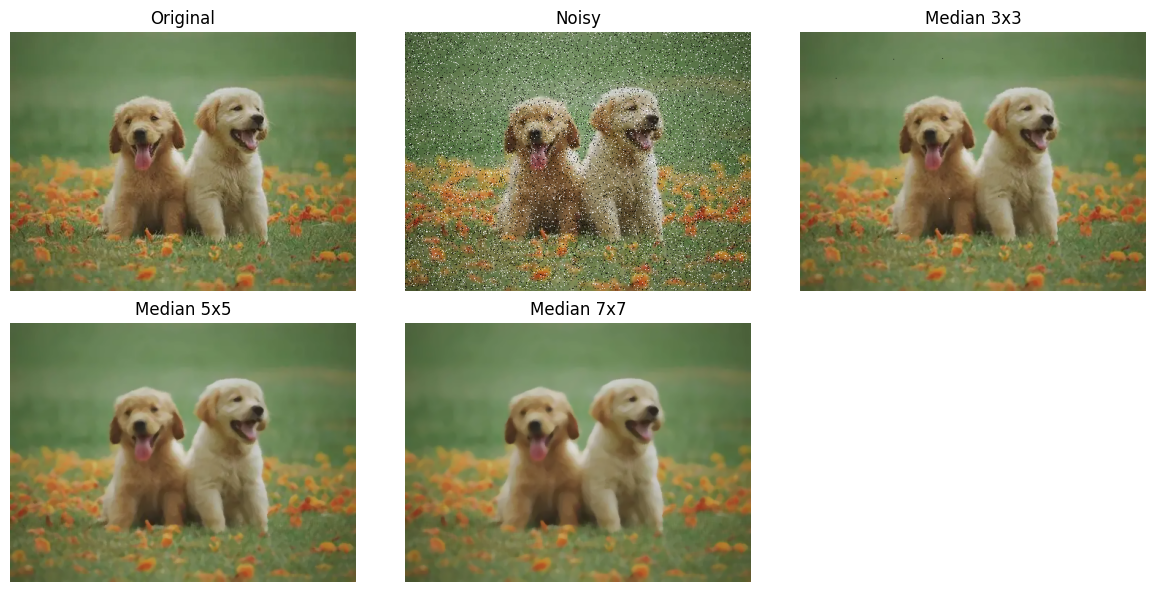

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Function to add salt & pepper noise ---
def add_salt_pepper_noise(img, density=0.05):
    noisy = img.copy()
    h, w = img.shape[:2]
    num_noise = int(density * h * w)  

    # Salt (white)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = [255, 255, 255]

    # Pepper (black)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = [0, 0, 0]

    return noisy

# --- Load an image ---
img = cv.imread("D:\SkyExpert\session1\images\dog.jpg")  

# If image not found, make a dummy one
if img is None:
    print(" Image not found! Using dummy gray image.")
    img = np.full((300, 300, 3), 200, dtype=np.uint8)

# Step 1: Add noise
noisy_img = add_salt_pepper_noise(img, density=0.05)

# Step 2: Apply median filters
median3 = cv.medianBlur(noisy_img, 3)
median5 = cv.medianBlur(noisy_img, 5)
median7 = cv.medianBlur(noisy_img, 7)

# --- Show results with matplotlib ---
titles = ["Original", "Noisy", "Median 3x3", "Median 5x5", "Median 7x7"]
images = [img, noisy_img, median3, median5, median7]

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

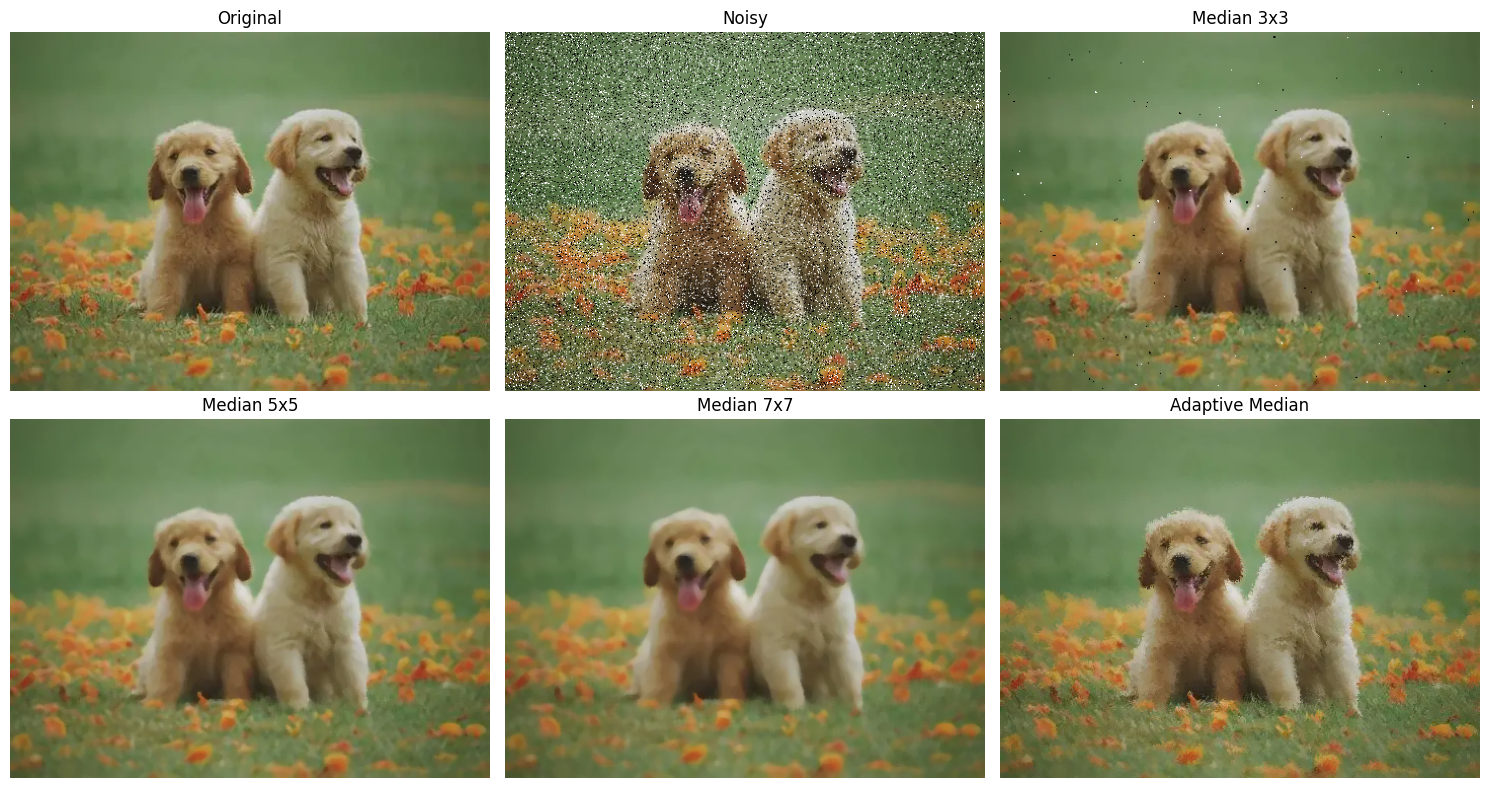

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Function to add salt & pepper noise ---
def add_salt_pepper_noise(img, density=0.05):
    noisy = img.copy()
    h, w = img.shape[:2]
    num_noise = int(density * h * w)

    # Salt (white)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = [255, 255, 255]

    # Pepper (black)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = [0, 0, 0]

    return noisy

# --- Adaptive Median Filter ---
def adaptive_median_filter(img, max_window_size=7):
    # If grayscale
    if len(img.shape) == 2:
        return _adaptive_median_gray(img, max_window_size)

    # If color → split channels
    channels = cv.split(img)
    filtered_channels = []
    for ch in channels:
        filtered_channels.append(_adaptive_median_gray(ch, max_window_size))
    return cv.merge(filtered_channels)

def _adaptive_median_gray(img, max_window_size):
    padded = np.pad(img, max_window_size//2, mode='edge')
    filtered = np.zeros_like(img)
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                half = window_size // 2
                region = padded[i:i+window_size, j:j+window_size]
                z_min, z_max, z_med = np.min(region), np.max(region), np.median(region)
                z_xy = img[i, j]

                if z_min < z_med < z_max:
                    if z_min < z_xy < z_max:
                        filtered[i, j] = z_xy
                    else:
                        filtered[i, j] = z_med
                    break
                else:
                    window_size += 2
                    if window_size > max_window_size:
                        filtered[i, j] = z_med
    return filtered

# --- Load an image ---
img = cv.imread("D:\SkyExpert\session1\images\dog.jpg")  
if img is None:
    print(" Image not found! Using dummy gray image.")
    img = np.full((300, 300, 3), 200, dtype=np.uint8)

# Step 1: Add noise
noisy_img = add_salt_pepper_noise(img, density=0.1)

# Step 2: Apply standard median filters
median3 = cv.medianBlur(noisy_img, 3)
median5 = cv.medianBlur(noisy_img, 5)
median7 = cv.medianBlur(noisy_img, 7)

# Step 3: Apply adaptive median filter
adaptive_median = adaptive_median_filter(noisy_img, max_window_size=7)

# --- Show results with matplotlib ---
titles = ["Original", "Noisy", "Median 3x3", "Median 5x5", "Median 7x7", "Adaptive Median"]
images = [img, noisy_img, median3, median5, median7, adaptive_median]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

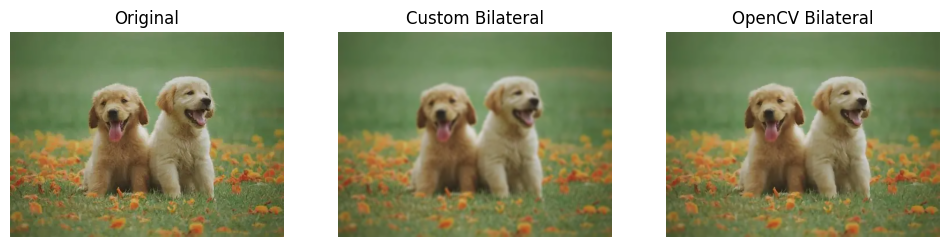

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Custom Bilateral Filter (Grayscale) ---
def bilateral_filter_custom_gray(img, diameter, sigma_color, sigma_space):
    padded = cv.copyMakeBorder(img, diameter//2, diameter//2, diameter//2, diameter//2,
                               cv.BORDER_REFLECT)
    filtered = np.zeros_like(img, dtype=np.float32)

    # Precompute spatial Gaussian
    ax = np.arange(-diameter//2 + 1, diameter//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    spatial_gaussian = np.exp(-(xx**2 + yy**2) / (2 * sigma_space**2))

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            region = padded[y:y+diameter, x:x+diameter]
            intensity_gaussian = np.exp(-((region - img[y, x])**2) / (2 * sigma_color**2))
            weights = spatial_gaussian * intensity_gaussian
            weights /= np.sum(weights)
            filtered[y, x] = np.sum(region * weights)

    return np.uint8(filtered)

# --- Color Support ---
def bilateral_filter_custom(img, diameter, sigma_color, sigma_space):
    if len(img.shape) == 2:
        return bilateral_filter_custom_gray(img, diameter, sigma_color, sigma_space)
    channels = cv.split(img)
    filtered_channels = [bilateral_filter_custom_gray(ch, diameter, sigma_color, sigma_space) for ch in channels]
    return cv.merge(filtered_channels)

# --- Load Image ---
img = cv.imread(r"D:\SkyExpert\session1\images\dog.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Check your path!")

# --- Apply Bilateral Filters ---
custom_bilateral = bilateral_filter_custom(img, diameter=5, sigma_color=50, sigma_space=50)
opencv_bilateral = cv.bilateralFilter(img, d=5, sigmaColor=50, sigmaSpace=50)

# --- Display Results with Matplotlib ---
titles = ["Original", "Custom Bilateral", "OpenCV Bilateral"]
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB),
          cv.cvtColor(custom_bilateral, cv.COLOR_BGR2RGB),
          cv.cvtColor(opencv_bilateral, cv.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()


### [BONUS] Task 15: Comprehensive Camera Task
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [ ]:
import cv2 as cv
import numpy as np
import sys

camera_id = 0
delay = 30  # ~30 ms for smoother video
window_name = 'Original'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit("Error: Could not open camera")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 1️⃣ Original
    original = frame

    # 2️⃣ Grayscale
    gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

    # 3️⃣ Add Gaussian noise
    noise = np.random.normal(0, 25, gray.shape).astype(np.uint8)  # mean=0, std=25
    noisy = cv.add(gray, noise)

    # 4️⃣ Denoise with median filter
    denoised = cv.medianBlur(noisy, 5)

    # 5️⃣ Sharpen using kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv.filter2D(denoised, -1, kernel)

    # Show all stages
    cv.imshow("Original", original)
    cv.imshow("Grayscale", gray)
    cv.imshow("Noisy", noisy)
    cv.imshow("Denoised (Median)", denoised)
    cv.imshow("Sharpened", sharpened)

    # Press 'q' to quit
    if cv.waitKey(delay) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [2]:
import cv2 as cv
import numpy as np


def apply_filters(frame):
    # Convert to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Gaussian Blur
    gauss = cv.GaussianBlur(gray, (5, 5), 1.5)

    # Median Blur
    median = cv.medianBlur(gray, 5)

    # Bilateral Filter
    bilateral = cv.bilateralFilter(gray, d=7, sigmaColor=50, sigmaSpace=50)

    # Stack results for visualization
    top_row = np.hstack((gray, gauss))
    bottom_row = np.hstack((median, bilateral))
    combined = np.vstack((top_row, bottom_row))

    return combined


# ---- Video Processing ----
def process_video(input_path, output_path):
    cap = cv.VideoCapture(input_path)
    
    # Get video properties
    width  = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv.CAP_PROP_FPS)

    # Define VideoWriter (double height because we stack results)
    fourcc = cv.VideoWriter_fourcc(*'XVID')
    out = cv.VideoWriter(output_path, fourcc, fps, (width*2, height*2), isColor=False)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Apply filters
        processed = apply_filters(frame)

        # Write to output video
        out.write(processed)

        # Show in real-time (optional)
        cv.imshow("Processed Video", processed)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv.destroyAllWindows()


# ---- Run ----
input_video = r"D:\SkyExpert\session1\videos\sample.mp4"   
output_video = r"D:\SkyExpert\session1\videos\processed_output.avi"

process_video(input_video, output_video)
print("✅ Video processing complete. Saved to:", output_video)


✅ Video processing complete. Saved to: D:\SkyExpert\session1\videos\processed_output.avi


### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

Standard Median Time: 0.017831087112426758 seconds
Adaptive Median Time: 16.672831296920776 seconds


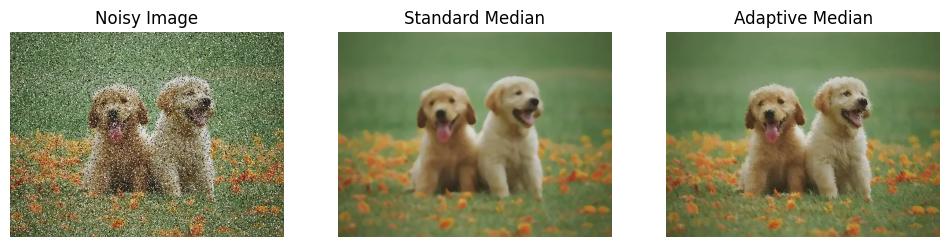

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

# --- Salt & Pepper Noise Function ---
def add_salt_pepper_noise(img, density=0.05):
    noisy = img.copy()
    h, w = img.shape[:2]
    num_noise = int(density * h * w)

    # Salt (white)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 255

    # Pepper (black)
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 0

    return noisy

# --- Adaptive Median Filter ---
def adaptive_median_filter(img, max_window_size=7):
    if len(img.shape) == 2:
        return _adaptive_median_gray(img, max_window_size)

    # Process each channel separately if color
    channels = cv.split(img)
    filtered_channels = [ _adaptive_median_gray(ch, max_window_size) for ch in channels ]
    return cv.merge(filtered_channels)

def _adaptive_median_gray(img, max_window_size):
    padded = np.pad(img, max_window_size//2, mode='edge')
    filtered = np.zeros_like(img)
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                region = padded[i:i+window_size, j:j+window_size]
                z_min, z_max, z_med = np.min(region), np.max(region), np.median(region)
                z_xy = img[i, j]

                if z_min < z_med < z_max:
                    if z_min < z_xy < z_max:
                        filtered[i, j] = z_xy
                    else:
                        filtered[i, j] = z_med
                    break
                else:
                    window_size += 2
                    if window_size > max_window_size:
                        filtered[i, j] = z_med
    return filtered

# --- Load Image ---
img_path = r"D:\SkyExpert\session1\images\dog.jpg"
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# --- Add Noise ---
noisy_img = add_salt_pepper_noise(img, density=0.1)

# --- Standard Median ---
start = time.time()
std_result = cv.medianBlur(noisy_img, 7)
print("Standard Median Time:", time.time() - start, "seconds")

# --- Adaptive Median ---
start = time.time()
adaptive_result = adaptive_median_filter(noisy_img, 7)
print("Adaptive Median Time:", time.time() - start, "seconds")

# --- Visualization ---
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(noisy_img, cv.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(std_result, cv.COLOR_BGR2RGB))
plt.title("Standard Median")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(adaptive_result, cv.COLOR_BGR2RGB))
plt.title("Adaptive Median")
plt.axis("off")

plt.show()
